## UNet Architecture

In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

In [5]:
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()

        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)
        self.enc5 = self.conv_block(512, 1024)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)

        self.dec1 = self.conv_block(1024, 512)
        self.dec2 = self.conv_block(512, 256)
        self.dec3 = self.conv_block(256, 128)
        self.dec4 = self.conv_block(128, 64)

        self.out = nn.Conv2d(64, out_channels, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):

        x1 = self.enc1(x)
        x2 = self.enc2(self.pool(x1))
        x3 = self.enc3(self.pool(x2))
        x4 = self.enc4(self.pool(x3))
        x5 = self.enc5(self.pool(x4))

        x = self.upconv4(x5)
        x = torch.cat([x, x4], dim=1)
        x = self.dec1(x)

        x = self.upconv3(x)
        x = torch.cat([x, x3], dim=1)
        x = self.dec2(x)

        x = self.upconv2(x)
        x = torch.cat([x, x2], dim=1)
        x = self.dec3(x)

        x = self.upconv1(x)
        x = torch.cat([x, x1], dim=1)
        x = self.dec4(x)
        
        x = self.out(x)
        return x

<class 'torch.Tensor'> torch.Size([1, 1, 512, 512])


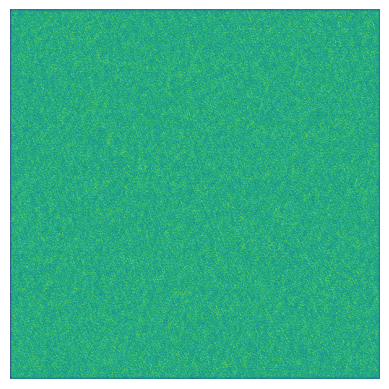

In [18]:
model = UNet(3, 1)
input_image = torch.rand(1, 3, 512, 512)
output = model(input_image)
print(type(output), output.size())
image = TF.to_pil_image(output.squeeze(0))

plt.imshow(image)
plt.axis('off')
plt.show()